# Code for Caya's individual project (Influence of input length triples on evaluation scores) 

## Evaluations

In [109]:
#imports
from csv import reader
from bert_score import BERTScorer
import pandas as pd
import sacrebleu
from nltk.translate.meteor_score import single_meteor_score

In [2]:
model_input = []
references = []
with open('/Users/cayadehaas/PycharmProjects/Communicative_Robots/triple_7_generated_sentences_vs_target_sentences.csv', 'r') as read_obj:
    # pass the file object to reader() to get the reader object
    evaluation_dataset = reader(read_obj, delimiter=',')
    #go over de dataset consisting of generated sentences and references 
    for index, modelinput, gold_references in evaluation_dataset:
        model_input.append(modelinput)
        references.append([gold_references])


### BERTScore

In [15]:
scorer = BERTScorer(lang="en", rescale_with_baseline=True)
P, R, F1 = scorer.score(model_input, references)


df = pd.DataFrame()
df['bertscore F1'] = F1
df['bertscore P'] = P
df['bertscore R'] = R
df


Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


,bertscore F1,bertscore P,bertscore R
0,0.572734,0.679075,0.469016
1,0.539722,0.646680,0.435352
2,0.551715,0.669271,0.437599
3,0.268270,0.431038,0.112857
4,0.342848,0.544794,0.153285
...,...,...,...
138,0.208051,0.363134,0.059369
139,0.229048,0.378535,0.085381
140,0.251820,0.537842,-0.007967
141,0.274937,0.572311,0.005932


In [16]:
target_and_generated_df=pd.read_csv('/Users/cayadehaas/PycharmProjects/Communicative_Robots/triple_7_generated_sentences_vs_target_sentences.csv', delimiter=',', header=None)
target_and_generated_df1 = target_and_generated_df[target_and_generated_df.columns[1:]]
target_and_generated_df1 = target_and_generated_df1.set_axis(['Generated sentences', 'Target sentences'], axis=1, inplace=False)
result = pd.concat([target_and_generated_df1, df], axis=1, join='inner')
result.to_csv('triple_7_generated_sentences_vs_target_sentences_bertscore.csv', mode='w', header=False)
result

,Generated sentences,Target sentences,bertscore F1,bertscore P,bertscore R
0,"Aaron Turner, who is from Massachusetts, start...",Aaron Turner is a post-metal musician from Mas...,0.572734,0.679075,0.469016
1,"Aaron Turner, who is from Massachusetts, start...",Aaron Turner is a post-metal musician born in ...,0.539722,0.646680,0.435352
2,"Aaron Turner, who is from Massachusetts, start...",Aaron Turner is a post metal performer from Ma...,0.551715,0.669271,0.437599
3,The main ingredients of Bionico are chopped fr...,"Mexicans, the inhabitants of Mexico, can use t...",0.268270,0.431038,0.112857
4,The main ingredients of Bionico are chopped fr...,"Much like a cookie, Bionico is a dessert food ...",0.342848,0.544794,0.153285
...,...,...,...,...,...
138,"SuperCapers, written by Ray Grriggs and starri...",Super Capers is a 98 minute American English m...,0.208051,0.363134,0.059369
139,"SuperCapers, written by Ray Grriggs and starri...","Super Capers, a movie in English, has a 98 min...",0.229048,0.378535,0.085381
140,"The Bedford Aerodrome, which serves the city o...",MotorSport Vision operates the Bedford Aerodro...,0.251820,0.537842,-0.007967
141,"The Bedford Aerodrome, which serves the city o...",MotorSport Vision is the operating organisatio...,0.274937,0.572311,0.005932


### BLEU

In [55]:
model_input = []
references = []
bleu_scores = []
df = pd.DataFrame()
with open('/Users/cayadehaas/PycharmProjects/Communicative_Robots/triple_1_generated_sentences_vs_target_sentences.csv', 'r') as read_obj:
    # pass the file object to reader() to get the reader object
    evaluation_dataset = reader(read_obj, delimiter=',')
    #go over de dataset consisting of generated sentences and references 
    for index, model_input, gold_references in evaluation_dataset:
        bleu = sacrebleu.sentence_bleu(model_input, [gold_references], smooth_method='exp')
        bleu_scores.append(bleu.score)
df['BLEU score'] = bleu_scores
df

,BLEU score
0,18.798318
1,18.798318
2,26.584836
3,55.936849
4,15.133219
...,...
911,5.816635
912,7.314032
913,7.495553
914,7.495553


In [56]:
target_and_generated_df=pd.read_csv('/Users/cayadehaas/PycharmProjects/Communicative_Robots/triple_1_generated_sentences_vs_target_sentences.csv', delimiter=',', header=None)
target_and_generated_df1 = target_and_generated_df[target_and_generated_df.columns[1:]]
target_and_generated_df1 = target_and_generated_df1.set_axis(['Generated sentences', 'Target sentences'], axis=1, inplace=False)
result = pd.concat([target_and_generated_df1, df], axis=1, join='inner')
result.to_csv('triple_1_generated_sentences_vs_target_sentences_sacrebleu.csv', mode='w', header=False)
result

,Generated sentences,Target sentences,BLEU score
0,The Motor Sport Sport Vision is located in Faw...,MotorSport Vision is located in the city of Fa...,18.798318
1,The Motor Sport Sport Vision is located in Faw...,MotorSport Vision is located in the city of Fa...,18.798318
2,The Motor Sport Sport Vision is located in Faw...,MotorSport Vision is located in Fawkham.,26.584836
3,The population density of Ciudad Ayala is 1604...,The population density of Ciudad Ayala is 1604.0.,55.936849
4,The population density of Ciudad Ayala is 1604...,Ciudad Ayala city has a population density of ...,15.133219
...,...,...,...
911,"John Miller starred in the film, ""Its Great to...",It's Great to Be Young is a 1956 film starring...,5.816635
912,"John Miller starred in the film, ""Its Great to...",John Mills had a main role in the movie It's G...,7.314032
913,Anatole de Groinwald is the author of Anatole ...,English Without Tears is written by Anatole de...,7.495553
914,Anatole de Groinwald is the author of Anatole ...,The writer of English Without Tears was Anatol...,7.495553


### BLEURT

In [159]:
import datasets
bleurt_scores = []
bleurt = datasets.load_metric("bleurt")
df = pd.DataFrame()
with open('/Users/cayadehaas/PycharmProjects/Communicative_Robots/triple_7_generated_sentences_vs_target_sentences.csv', 'r') as read_obj:
    # pass the file object to reader() to get the reader object
    evaluation_dataset = reader(read_obj, delimiter=',')
    #go over de dataset consisting of generated sentences and references 
    for index, model_input, gold_references in evaluation_dataset:
        results = bleurt.compute(predictions=[model_input], references=[gold_references])
        bleurt_scores.append(str(results['scores'])[1:-1])

df['BLEURT score'] = bleurt_scores
df

Using default BLEURT-Base checkpoint for sequence maximum length 128. You can use a bigger model for better results with e.g.: datasets.load_metric('bleurt', 'bleurt-large-512').


INFO:tensorflow:Reading checkpoint /Users/cayadehaas/.cache/huggingface/metrics/bleurt/default/downloads/extracted/54a875a4f9bb88a8a8089475fb9fcf960f0549ccb6c461a273438491507cdeef/bleurt-base-128.
INFO:tensorflow:Config file found, reading.
INFO:tensorflow:Will load checkpoint bert_custom
INFO:tensorflow:Loads full paths and checks that files exists.
INFO:tensorflow:... name:bert_custom
INFO:tensorflow:... vocab_file:vocab.txt
INFO:tensorflow:... bert_config_file:bert_config.json
INFO:tensorflow:... do_lower_case:True
INFO:tensorflow:... max_seq_length:128
INFO:tensorflow:Creating BLEURT scorer.
INFO:tensorflow:Creating WordPiece tokenizer.
INFO:tensorflow:WordPiece tokenizer instantiated.
INFO:tensorflow:Creating Eager Mode predictor.
INFO:tensorflow:Loading model.
INFO:tensorflow:BLEURT initialized.


,BLEURT score
0,-0.0005433075129985809
1,0.020197149366140366
2,0.015851829200983047
3,-0.8279287815093994
4,-0.7209585309028625
...,...
138,-0.8188604116439819
139,-0.9424712061882019
140,-0.5743997097015381
141,-0.740348219871521


In [160]:
target_and_generated_df=pd.read_csv('/Users/cayadehaas/PycharmProjects/Communicative_Robots/triple_7_generated_sentences_vs_target_sentences.csv', delimiter=',', header=None)
target_and_generated_df1 = target_and_generated_df[target_and_generated_df.columns[1:]]
target_and_generated_df1 = target_and_generated_df1.set_axis(['Generated sentences', 'Target sentences'], axis=1, inplace=False)
result = pd.concat([target_and_generated_df1, df], axis=1, join='inner')
result.to_csv('triple_7_generated_sentences_vs_target_sentences_bleurt.csv', mode='w', header=False)
result

,Generated sentences,Target sentences,BLEURT score
0,"Aaron Turner, who is from Massachusetts, start...",Aaron Turner is a post-metal musician from Mas...,-0.0005433075129985809
1,"Aaron Turner, who is from Massachusetts, start...",Aaron Turner is a post-metal musician born in ...,0.020197149366140366
2,"Aaron Turner, who is from Massachusetts, start...",Aaron Turner is a post metal performer from Ma...,0.015851829200983047
3,The main ingredients of Bionico are chopped fr...,"Mexicans, the inhabitants of Mexico, can use t...",-0.8279287815093994
4,The main ingredients of Bionico are chopped fr...,"Much like a cookie, Bionico is a dessert food ...",-0.7209585309028625
...,...,...,...
138,"SuperCapers, written by Ray Grriggs and starri...",Super Capers is a 98 minute American English m...,-0.8188604116439819
139,"SuperCapers, written by Ray Grriggs and starri...","Super Capers, a movie in English, has a 98 min...",-0.9424712061882019
140,"The Bedford Aerodrome, which serves the city o...",MotorSport Vision operates the Bedford Aerodro...,-0.5743997097015381
141,"The Bedford Aerodrome, which serves the city o...",MotorSport Vision is the operating organisatio...,-0.740348219871521


## Plots

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

### BERTScore

In [26]:
f1_list_of_lists = []
#add f1 scores of all triple groups together
for i in range(1, 8): 
    target_and_generated_df = pd.read_csv('triple_' + str(i) + '_generated_sentences_vs_target_sentences_bertscore.csv', delimiter=',', header=None)
    locals()['f1_' + str(i)] = target_and_generated_df[target_and_generated_df.columns[3:4]] 
    for value in locals()['f1_' + str(i)][3]:
        element = [value, int(i)]
        f1_list_of_lists.append(element)
                
f1_list_of_lists

[[0.5282784, 1],
 [0.4601778, 1],
 [0.55715716, 1],
 [0.84669805, 1],
 [0.5826537, 1],
 [0.6946025, 1],
 [0.6594752, 1],
 [0.4663871, 1],
 [0.54109395, 1],
 [0.5621572, 1],
 [0.6883748, 1],
 [0.34701058, 1],
 [0.57231206, 1],
 [0.83031803, 1],
 [0.758422, 1],
 [0.76922244, 1],
 [0.26888868, 1],
 [0.25207713, 1],
 [0.26705155, 1],
 [0.18259145, 1],
 [0.21052903, 1],
 [0.1646208, 1],
 [0.35795295, 1],
 [0.31344077, 1],
 [0.6256801, 1],
 [0.2513729, 1],
 [0.30886945, 1],
 [0.3651836, 1],
 [0.48712158, 1],
 [0.43921554, 1],
 [0.490394, 1],
 [0.8097241, 1],
 [0.7227834, 1],
 [0.37887463, 1],
 [0.4482346, 1],
 [0.4690556, 1],
 [0.26405427, 1],
 [0.31595033, 1],
 [0.32188347, 1],
 [0.27555746, 1],
 [0.37047467, 1],
 [0.31182894, 1],
 [0.35218334, 1],
 [0.3411919, 1],
 [0.22165504, 1],
 [0.08023593, 1],
 [0.18566254, 1],
 [0.1914106, 1],
 [0.5568001, 1],
 [0.69253016, 1],
 [0.5047896, 1],
 [0.5083671, 1],
 [0.47271436, 1],
 [0.4538336, 1],
 [0.37664688, 1],
 [0.4113327, 1],
 [0.52183956, 1],
 

In [27]:
df = pd.DataFrame(f1_list_of_lists, columns=['F1 score', 'triple length'])
df

,F1 score,triple length
0,0.528278,1
1,0.460178,1
2,0.557157,1
3,0.846698,1
4,0.582654,1
...,...,...
2981,0.208051,7
2982,0.229048,7
2983,0.251820,7
2984,0.274937,7


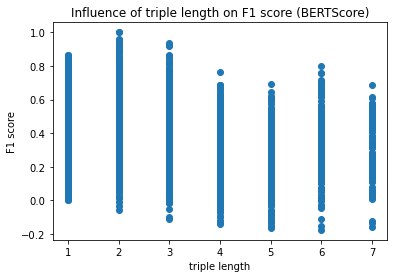

In [4]:
plt.xlabel('triple length')
plt.ylabel('F1 score')
plt.title('Influence of triple length on F1 score (BERTScore)')
plt.scatter(df['triple length'], df['F1 score'])
plt.show()

In [35]:
f1_list_of_lists_boxplot = []
#add scores of all triple groups together
for i in range(1, 8): 
    target_and_generated_df = pd.read_csv('triple_' + str(i) + '_generated_sentences_vs_target_sentences_bertscore.csv', delimiter=',', header=None)
    locals()['f1_' + str(i)] = target_and_generated_df[target_and_generated_df.columns[3:4]] 
    elements = [] 
    for value in locals()['f1_' + str(i)][3]:
        elements.append(value)
    f1_list_of_lists_boxplot.append(elements)
                
f1_list_of_lists_boxplot

[[0.5282784,
  0.4601778,
  0.55715716,
  0.84669805,
  0.5826537,
  0.6946025,
  0.6594752,
  0.4663871,
  0.54109395,
  0.5621572,
  0.6883748,
  0.34701058,
  0.57231206,
  0.83031803,
  0.758422,
  0.76922244,
  0.26888868,
  0.25207713,
  0.26705155,
  0.18259145,
  0.21052903,
  0.1646208,
  0.35795295,
  0.31344077,
  0.6256801,
  0.2513729,
  0.30886945,
  0.3651836,
  0.48712158,
  0.43921554,
  0.490394,
  0.8097241,
  0.7227834,
  0.37887463,
  0.4482346,
  0.4690556,
  0.26405427,
  0.31595033,
  0.32188347,
  0.27555746,
  0.37047467,
  0.31182894,
  0.35218334,
  0.3411919,
  0.22165504,
  0.08023593,
  0.18566254,
  0.1914106,
  0.5568001,
  0.69253016,
  0.5047896,
  0.5083671,
  0.47271436,
  0.4538336,
  0.37664688,
  0.4113327,
  0.52183956,
  0.4780079,
  0.5145651,
  0.6092987,
  0.5042217,
  0.6804573,
  0.621297,
  0.64403784,
  0.15730682,
  0.18650024,
  0.1276292,
  0.48127005,
  0.26292557,
  0.5653745,
  0.24719925,
  0.3791303,
  0.37300825,
  0.6646593,
  

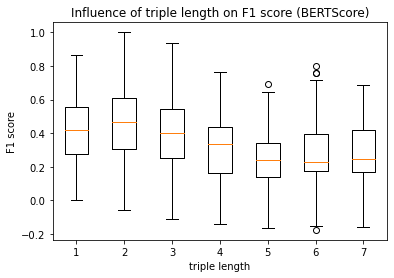

In [6]:
plt.xlabel('triple length')
plt.ylabel('F1 score')
plt.title('Influence of triple length on F1 score (BERTScore)')
plt.boxplot(f1_list_of_lists_boxplot)
# plt.savefig('boxplot_sacrebleu.png')
plt.show()


### sacreBLEU

In [30]:
score_list_of_lists = []
#add f1 scores of all triple groups together
for i in range(1, 8): 
    target_and_generated_df = pd.read_csv('triple_' + str(i) + '_generated_sentences_vs_target_sentences_sacrebleu.csv', delimiter=',', header=None)
    locals()['sacrebleu_' + str(i)] = target_and_generated_df[target_and_generated_df.columns[3:4]] 
    for value in locals()['sacrebleu_' + str(i)][3]:
        element = [value, int(i)]
        score_list_of_lists.append(element)
                
score_list_of_lists

[[18.798317647335093, 1],
 [18.798317647335093, 1],
 [26.58483576665878, 1],
 [55.93684915933074, 1],
 [15.133218633429316, 1],
 [19.338531381761715, 1],
 [20.706193828327603, 1],
 [10.70454632987902, 1],
 [17.02602472176709, 1],
 [9.238430210261097, 1],
 [39.553325358771794, 1],
 [13.674406678232565, 1],
 [47.03709593866896, 1],
 [58.28233954152656, 1],
 [38.35193624233828, 1],
 [30.62049088236489, 1],
 [8.889175589171739, 1],
 [6.754312828675707, 1],
 [5.448844552389355, 1],
 [5.679677445135579, 1],
 [6.285596338261262, 1],
 [11.35935489027116, 1],
 [6.917184228205474, 1],
 [7.3140318268287645, 1],
 [44.28500142691474, 1],
 [6.844195245453219, 1],
 [17.542198478193427, 1],
 [27.901593935858266, 1],
 [12.451643194233869, 1],
 [12.451643194233869, 1],
 [13.834368456410951, 1],
 [59.5640359271809, 1],
 [38.058030016749456, 1],
 [6.839596061560946, 1],
 [18.842393723950345, 1],
 [8.513012360883545, 1],
 [5.401157445454033, 1],
 [10.521495173810226, 1],
 [3.0372940354383413, 1],
 [3.00980

In [8]:
df = pd.DataFrame(score_list_of_lists, columns=['BLEU score', 'triple length'])
df

,BLEU score,triple length
0,18.798318,1
1,18.798318,1
2,26.584836,1
3,55.936849,1
4,15.133219,1
...,...,...
2981,1.206347,7
2982,0.569838,7
2983,2.397507,7
2984,1.884182,7


In [40]:
score_list_of_lists_boxplot = []
#add scores of all triple groups together
for i in range(1, 8): 
    target_and_generated_df = pd.read_csv('triple_' + str(i) + '_generated_sentences_vs_target_sentences_sacrebleu.csv', delimiter=',', header=None)
    locals()['sacrebleu_' + str(i)] = target_and_generated_df[target_and_generated_df.columns[3:4]] 
    elements = [] 
    for value in locals()['sacrebleu_' + str(i)][3]:
        elements.append(value)
    score_list_of_lists_boxplot.append(elements)
                
score_list_of_lists_boxplot

[[18.798317647335093,
  18.798317647335093,
  26.58483576665878,
  55.93684915933074,
  15.133218633429316,
  19.338531381761715,
  20.706193828327603,
  10.70454632987902,
  17.02602472176709,
  9.238430210261097,
  39.553325358771794,
  13.674406678232565,
  47.03709593866896,
  58.28233954152656,
  38.35193624233828,
  30.62049088236489,
  8.889175589171739,
  6.754312828675707,
  5.448844552389355,
  5.679677445135579,
  6.285596338261262,
  11.35935489027116,
  6.917184228205474,
  7.3140318268287645,
  44.28500142691474,
  6.844195245453219,
  17.542198478193427,
  27.901593935858266,
  12.451643194233869,
  12.451643194233869,
  13.834368456410951,
  59.5640359271809,
  38.058030016749456,
  6.839596061560946,
  18.842393723950345,
  8.513012360883545,
  5.401157445454033,
  10.521495173810226,
  3.0372940354383413,
  3.0098043843528286,
  10.123734869668828,
  5.751391809950023,
  9.66926569088086,
  9.238430210261097,
  4.065425428798724,
  3.0098043843528286,
  5.439330544349

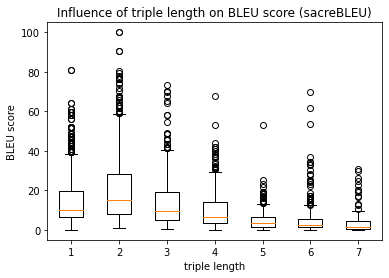

In [10]:
plt.xlabel('triple length')
plt.ylabel('BLEU score')
plt.title('Influence of triple length on BLEU score (sacreBLEU)')
plt.boxplot(score_list_of_lists_boxplot)
# plt.savefig('boxplot_sacrebleu.png')
plt.show()

### BLEURT

In [8]:
bleurt_list_of_lists = []
#add f1 scores of all triple groups together
for i in range(1, 8): 
    target_and_generated_df = pd.read_csv('triple_' + str(i) + '_generated_sentences_vs_target_sentences_bleurt.csv', delimiter=',', header=None)
    locals()['bleurt_' + str(i)] = target_and_generated_df[target_and_generated_df.columns[3:4]] 
    for value in locals()['bleurt_' + str(i)][3]:
        element = [value, int(i)]
        bleurt_list_of_lists.append(element)
                
bleurt_list_of_lists

[[-0.1122783869504928, 1],
 [-0.1043172478675842, 1],
 [0.0464056991040706, 1],
 [0.6575282216072083, 1],
 [0.4021079540252685, 1],
 [0.6013794541358948, 1],
 [0.4903866648674011, 1],
 [0.4014088213443756, 1],
 [0.1328971087932586, 1],
 [0.4167943000793457, 1],
 [0.6686517000198364, 1],
 [0.1585394442081451, 1],
 [0.2400297820568084, 1],
 [0.4344501197338104, 1],
 [0.1652875989675521, 1],
 [0.3390487134456634, 1],
 [-0.7893006205558777, 1],
 [-0.9167526364326476, 1],
 [-0.868751049041748, 1],
 [-1.347403049468994, 1],
 [-1.3928169012069702, 1],
 [-1.3150538206100464, 1],
 [-0.4442816078662872, 1],
 [-0.2273441106081009, 1],
 [0.0467001013457775, 1],
 [-0.7043834924697876, 1],
 [-0.4979948401451111, 1],
 [-0.5539870262145996, 1],
 [0.1690535396337509, 1],
 [0.02645830437541, 1],
 [0.2040044069290161, 1],
 [0.7986738681793213, 1],
 [0.5329331755638123, 1],
 [0.0595290325582027, 1],
 [-0.0429520495235919, 1],
 [0.1355616897344589, 1],
 [-0.8144803047180176, 1],
 [-0.6921075582504272, 1],


In [9]:
bleurt_df = pd.DataFrame(bleurt_list_of_lists, columns=['BLEURT score', 'triple length'])
bleurt_df

,BLEURT score,triple length
0,-0.112278,1
1,-0.104317,1
2,0.046406,1
3,0.657528,1
4,0.402108,1
...,...,...
2981,-0.818860,7
2982,-0.942471,7
2983,-0.574400,7
2984,-0.740348,7


In [7]:
bleurt_list_of_lists_boxplot = []
#add scores of all triple groups together
for i in range(1, 8): 
    target_and_generated_df = pd.read_csv('triple_' + str(i) + '_generated_sentences_vs_target_sentences_bleurt.csv', delimiter=',', header=None)
    locals()['bleurt_' + str(i)] = target_and_generated_df[target_and_generated_df.columns[3:4]] 
    elements = [] 
    for value in locals()['bleurt_' + str(i)][3]:
        elements.append(value)
    bleurt_list_of_lists_boxplot.append(elements)
                
bleurt_list_of_lists_boxplot

[[-0.1122783869504928,
  -0.1043172478675842,
  0.0464056991040706,
  0.6575282216072083,
  0.4021079540252685,
  0.6013794541358948,
  0.4903866648674011,
  0.4014088213443756,
  0.1328971087932586,
  0.4167943000793457,
  0.6686517000198364,
  0.1585394442081451,
  0.2400297820568084,
  0.4344501197338104,
  0.1652875989675521,
  0.3390487134456634,
  -0.7893006205558777,
  -0.9167526364326476,
  -0.868751049041748,
  -1.347403049468994,
  -1.3928169012069702,
  -1.3150538206100464,
  -0.4442816078662872,
  -0.2273441106081009,
  0.0467001013457775,
  -0.7043834924697876,
  -0.4979948401451111,
  -0.5539870262145996,
  0.1690535396337509,
  0.02645830437541,
  0.2040044069290161,
  0.7986738681793213,
  0.5329331755638123,
  0.0595290325582027,
  -0.0429520495235919,
  0.1355616897344589,
  -0.8144803047180176,
  -0.6921075582504272,
  -0.6557984352111816,
  0.0098756588995456,
  0.1587782055139541,
  0.0527197234332561,
  -0.2794543504714966,
  -0.3307963013648987,
  -0.229102164506

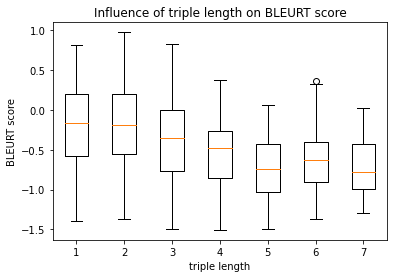

In [14]:
plt.xlabel('triple length')
plt.ylabel('BLEURT score')
plt.title('Influence of triple length on BLEURT score')
plt.boxplot(bleurt_list_of_lists_boxplot)
# plt.savefig('boxplot_bleurt.png')
plt.show()

## Median scores of all evaluation metrics

### BERTScore

In [38]:
import statistics


In [39]:
#TODO: add median values of all evaluation metrics in table 
f1_list_of_lists_boxplot
row_median_bertscore = [statistics.median(sub_list) for sub_list in f1_list_of_lists_boxplot]
row_median_bertscore

[0.419962375,
 0.46593824,
 0.39865169,
 0.333126205,
 0.2423115,
 0.23063701,
 0.2488962]

### BLEU

In [41]:
score_list_of_lists_boxplot
row_median_bleu = [statistics.median(sub_list) for sub_list in score_list_of_lists_boxplot]
row_median_bleu

[10.28380334261945,
 14.957108065111516,
 9.594898526562941,
 6.400842731792659,
 3.4325894832060992,
 2.6301135660938653,
 1.6713341775157178]

### BLEURT

In [42]:
bleurt_list_of_lists_boxplot
row_average_bleurt = [statistics.median(sub_list) for sub_list in bleurt_list_of_lists_boxplot]
row_average_bleurt

[-0.15835150331258768,
 -0.1862091422080993,
 -0.35100916028022766,
 -0.4812449067831039,
 -0.7350031137466431,
 -0.6326810717582703,
 -0.7785648703575134]

## Hypothesis test 

### Test is difference in scores (within same evaluation metric) is significant --> Kruskal-wallis


In [23]:
from scipy import stats

### BERTScore

In [29]:
for i in range(len(score_list_of_lists_boxplot)):
    exec('list{}={}'.format(str(i+1), score_list_of_lists_boxplot[i]))

5.777927155670148e-10

In [28]:
score_list_of_lists_boxplot

[[18.798317647335093,
  18.798317647335093,
  26.58483576665878,
  55.93684915933074,
  15.133218633429316,
  19.338531381761715,
  20.706193828327603,
  10.70454632987902,
  17.02602472176709,
  9.238430210261097,
  39.553325358771794,
  13.674406678232565,
  47.03709593866896,
  58.28233954152656,
  38.35193624233828,
  30.62049088236489,
  8.889175589171739,
  6.754312828675707,
  5.448844552389355,
  5.679677445135579,
  6.285596338261262,
  11.35935489027116,
  6.917184228205474,
  7.3140318268287645,
  44.28500142691474,
  6.844195245453219,
  17.542198478193427,
  27.901593935858266,
  12.451643194233869,
  12.451643194233869,
  13.834368456410951,
  59.5640359271809,
  38.058030016749456,
  6.839596061560946,
  18.842393723950345,
  8.513012360883545,
  5.401157445454033,
  10.521495173810226,
  3.0372940354383413,
  3.0098043843528286,
  10.123734869668828,
  5.751391809950023,
  9.66926569088086,
  9.238430210261097,
  4.065425428798724,
  3.0098043843528286,
  5.439330544349

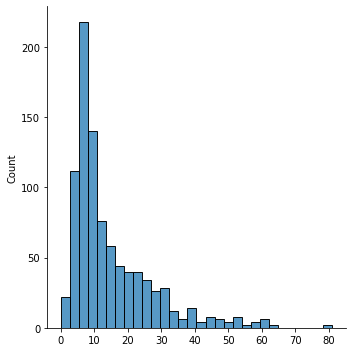

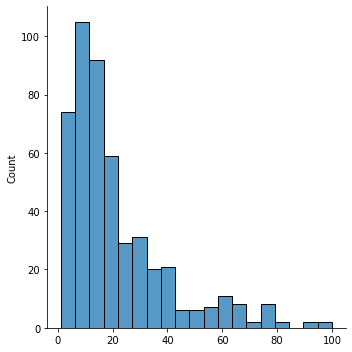

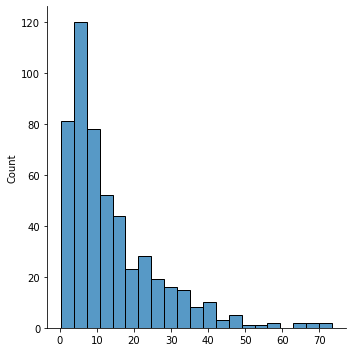

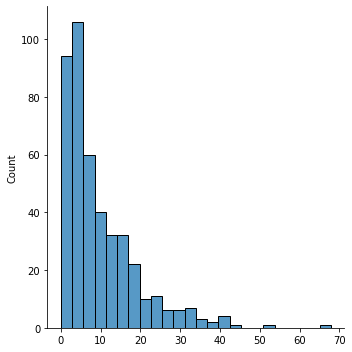

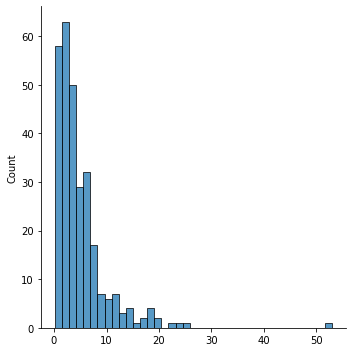

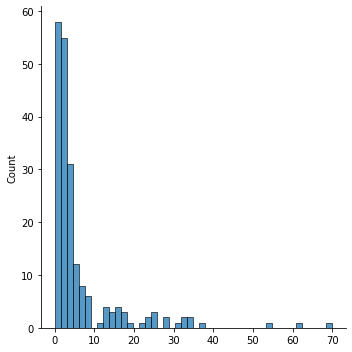

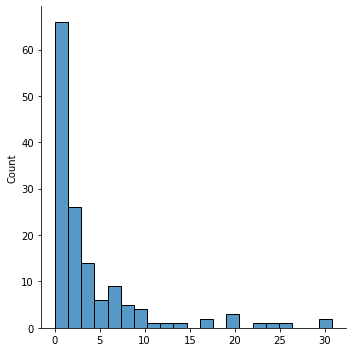

In [34]:
sns.displot(list1)
sns.displot(list2)
sns.displot(list3)
sns.displot(list4)
sns.displot(list5)
sns.displot(list6)
sns.displot(list7)
#distribution shape is the same for all groups --> use mean values


In [28]:
bertscore_df = pd.DataFrame(f1_list_of_lists, columns=['F1 score', 'triple length'])
bertscore_df

,F1 score,triple length
0,0.528278,1
1,0.460178,1
2,0.557157,1
3,0.846698,1
4,0.582654,1
...,...,...
2981,0.208051,7
2982,0.229048,7
2983,0.251820,7
2984,0.274937,7


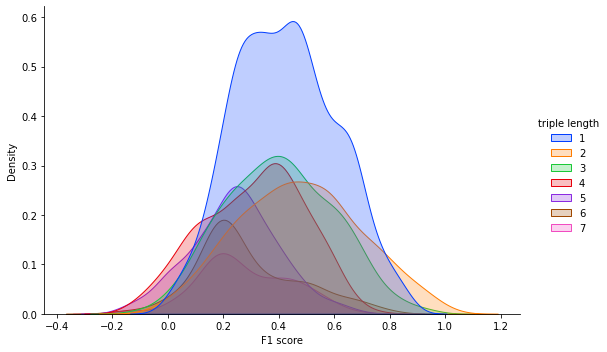

In [29]:
# check distribution of different groups 
sns_plot = sns.displot(data=bertscore_df, x='F1 score', hue='triple length', kind='kde', fill=True, palette=sns.color_palette('bright')[:7], height=5, aspect=1.5)
sns_plot.figure.savefig("distribution_bertscore.png")

In [37]:
stats.kruskal(list1, list2, list3, list4, list5, list6, list7)
#the mean is not equal across all groups so the difference between the scores is statistically significant

KruskalResult(statistic=779.0601837169627, pvalue=5.146505362713868e-165)

### BLEURT

In [43]:
bleurt_df = pd.DataFrame(bleurt_list_of_lists, columns=['BLEURT score', 'triple length'])
bleurt_df

,BLEURT score,triple length
0,-0.112278,1
1,-0.104317,1
2,0.046406,1
3,0.657528,1
4,0.402108,1
...,...,...
2981,-0.818860,7
2982,-0.942471,7
2983,-0.574400,7
2984,-0.740348,7


In [44]:
# sort data in ascending order
ascending_bleurt_df = bleurt_df.sort_values(by='BLEURT score', ascending=True)
ascending_bleurt_df

,BLEURT score,triple length
2093,-1.506255,4
2586,-1.491870,5
1577,-1.491727,3
2584,-1.487423,5
2388,-1.474097,5
...,...,...
1352,0.872012,2
921,0.878691,2
1348,0.880114,2
1197,0.956258,2


In [45]:
#round score
rounded_bleurt_df = ascending_bleurt_df.round(3)
rounded_bleurt_df

,BLEURT score,triple length
2093,-1.506,4
2586,-1.492,5
1577,-1.492,3
2584,-1.487,5
2388,-1.474,5
...,...,...
1352,0.872,2
921,0.879,2
1348,0.880,2
1197,0.956,2


In [46]:
#rank the scores
rounded_bleurt_df['mean_rank'] = rounded_bleurt_df['BLEURT score'].rank(method='average')
rounded_bleurt_df

,BLEURT score,triple length,mean_rank
2093,-1.506,4,1.0
2586,-1.492,5,2.5
1577,-1.492,3,2.5
2584,-1.487,5,4.0
2388,-1.474,5,5.0
...,...,...,...
1352,0.872,2,2982.0
921,0.879,2,2983.0
1348,0.880,2,2984.0
1197,0.956,2,2985.0


In [47]:
#average ranks 
arrange_back_rounded_bleurt_df = rounded_bleurt_df.sort_values(by='triple length', ascending=True)
arrange_back_rounded_bleurt_df

,BLEURT score,triple length,mean_rank
761,-0.733,1,821.5
456,-0.477,1,1299.0
914,-0.477,1,1299.0
588,0.143,1,2466.5
130,0.143,1,2466.5
...,...,...,...
2947,-0.355,7,1569.0
2861,-1.123,7,194.5
2938,-0.801,7,709.5
2897,-0.359,7,1558.5


In [48]:
# calculate sum of ranks for each triple length group 
final_df = arrange_back_rounded_bleurt_df.groupby(["triple length"]).mean_rank.sum().reset_index()
final_df

,triple length,mean_rank
0,1,1674162.0
1,2,867314.5
2,3,778803.0
3,4,532534.0
4,5,257885.0
5,6,221708.0
6,7,127184.5


In [49]:
for i in range(len(bleurt_list_of_lists_boxplot)):
    exec('list_bleurt{}={}'.format(str(i+1), bleurt_list_of_lists_boxplot[i]))

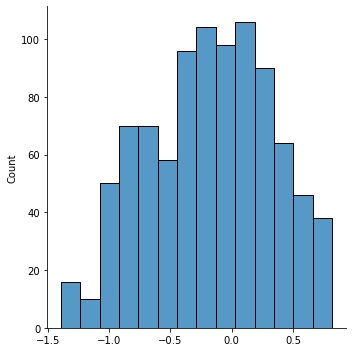

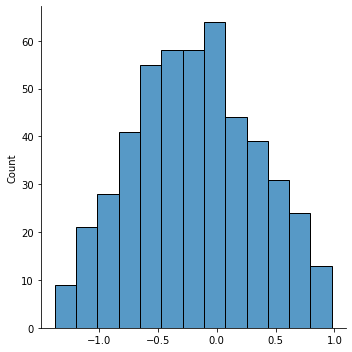

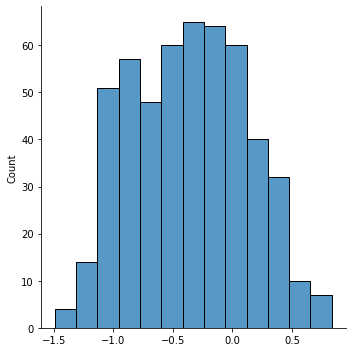

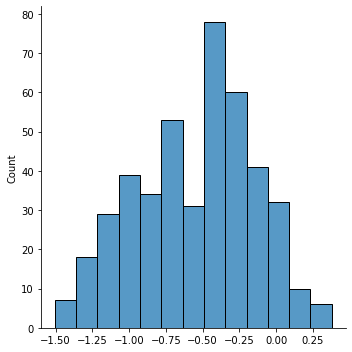

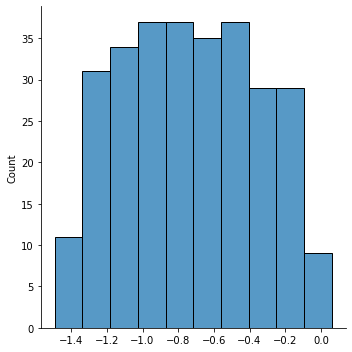

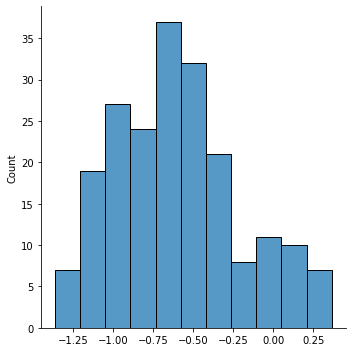

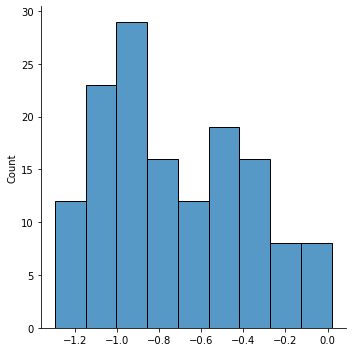

In [50]:
sns.displot(list_bleurt1)
sns.displot(list_bleurt2)
sns.displot(list_bleurt3)
sns.displot(list_bleurt4)
sns.displot(list_bleurt5)
sns.displot(list_bleurt6)
sns.displot(list_bleurt7)

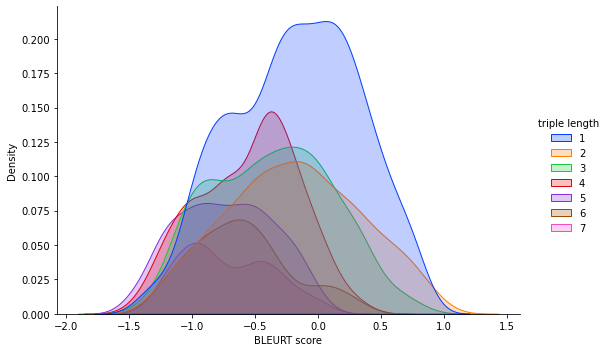

In [21]:
# check distribution of different groups 
sns_plot = sns.displot(data=bleurt_df, x='BLEURT score', hue='triple length', kind='kde', fill=True, palette=sns.color_palette('bright')[:7], height=5, aspect=1.5)
sns_plot.figure.savefig("distribution_bleurt.png")


In [51]:
# perform kruskal wallis test
stats.kruskal(list_bleurt1, list_bleurt2, list_bleurt3, list_bleurt4, list_bleurt5, list_bleurt6, list_bleurt7)

KruskalResult(statistic=494.9657583026222, pvalue=1.0212244363302711e-103)

In [52]:
N = len(bleurt_df)
nj1 = len(list_bleurt1)
nj2 = len(list_bleurt2)
nj3 = len(list_bleurt3)
nj4 = len(list_bleurt4)
nj5 = len(list_bleurt5)
nj6 = len(list_bleurt6)
nj7 = len(list_bleurt7)
nj1

916

In [53]:
H = (12/(N*(N+1)))* (((1674283.0**2)/nj1) + ((867331.5**2)/nj2) + ((778680.0**2)/nj3) + ((532422**2)/nj4) + ((257812.0**2)/nj5) + ((221793.5**2)/nj6) + ((127269.0**2)/nj7)) - 3*(N+1)
H

495.1061749855089

find the critical chi-square value 
H0: distributions are equal 
df = 7 - 1 
alpha = 0.10
X^2 = 10.645 
since H calc > X2 ; Reject the Null Hypothesis 

kruskal wallis test with mean values shows similar H statistic

### BLEU

In [93]:
score_list_of_lists_boxplot 

[[18.798317647335093,
  18.798317647335093,
  26.58483576665878,
  55.93684915933074,
  15.133218633429316,
  19.338531381761715,
  20.706193828327603,
  10.70454632987902,
  17.02602472176709,
  9.238430210261097,
  39.553325358771794,
  13.674406678232565,
  47.03709593866896,
  58.28233954152656,
  38.35193624233828,
  30.62049088236489,
  8.889175589171739,
  6.754312828675707,
  5.448844552389355,
  5.679677445135579,
  6.285596338261262,
  11.35935489027116,
  6.917184228205474,
  7.3140318268287645,
  44.28500142691474,
  6.844195245453219,
  17.542198478193427,
  27.901593935858266,
  12.451643194233869,
  12.451643194233869,
  13.834368456410951,
  59.5640359271809,
  38.058030016749456,
  6.839596061560946,
  18.842393723950345,
  8.513012360883545,
  5.401157445454033,
  10.521495173810226,
  3.0372940354383413,
  3.0098043843528286,
  10.123734869668828,
  5.751391809950023,
  9.66926569088086,
  9.238430210261097,
  4.065425428798724,
  3.0098043843528286,
  5.439330544349

In [95]:
for i in range(len(score_list_of_lists_boxplot)):
    exec('list_bleu{}={}'.format(str(i+1), score_list_of_lists_boxplot[i]))

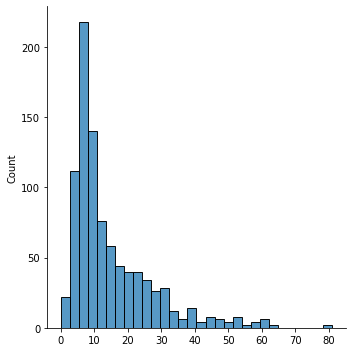

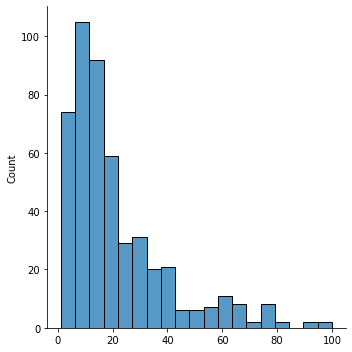

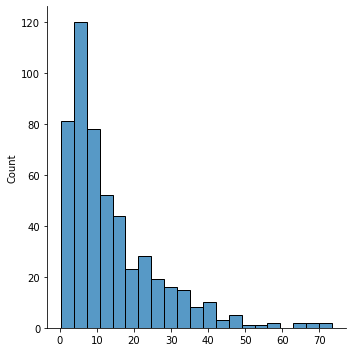

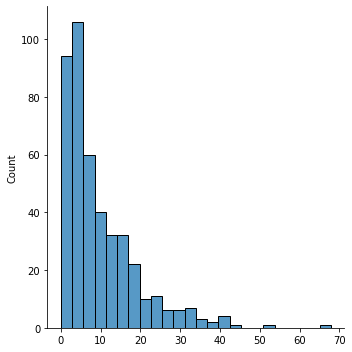

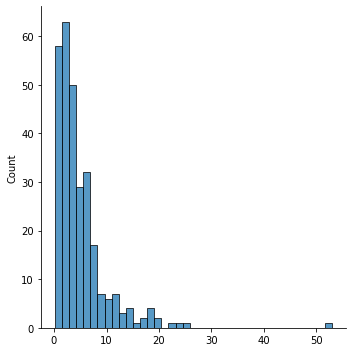

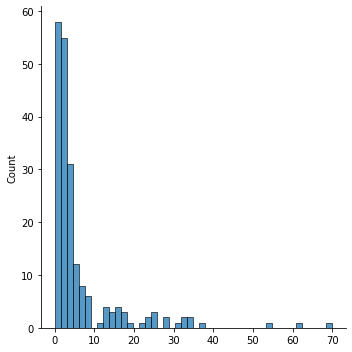

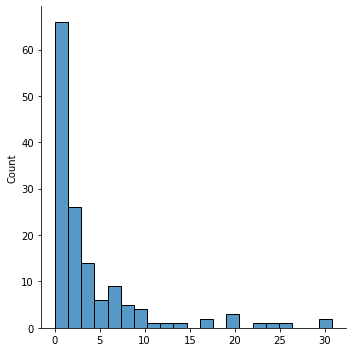

In [96]:
sns.displot(list_bleu1)
sns.displot(list_bleu2)
sns.displot(list_bleu3)
sns.displot(list_bleu4)
sns.displot(list_bleu5)
sns.displot(list_bleu6)
sns.displot(list_bleu7)

In [31]:
bleu_df = pd.DataFrame(score_list_of_lists, columns=['BLEU score', 'triple length'])
bleu_df

,BLEU score,triple length
0,18.798318,1
1,18.798318,1
2,26.584836,1
3,55.936849,1
4,15.133219,1
...,...,...
2981,1.206347,7
2982,0.569838,7
2983,2.397507,7
2984,1.884182,7


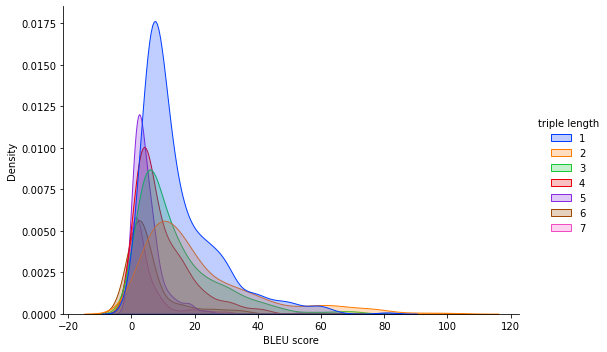

In [33]:
# check distribution of different groups 
sns_plot = sns.displot(data=bleu_df, x='BLEU score', hue='triple length', kind='kde', fill=True, palette=sns.color_palette('bright')[:7], height=5, aspect=1.5)
sns_plot.figure.savefig("distribution_bleu.png")


In [97]:
stats.kruskal(list_bleu1, list_bleu2, list_bleu3, list_bleu4, list_bleu5, list_bleu6, list_bleu7)


KruskalResult(statistic=779.0601837169627, pvalue=5.146505362713868e-165)